<a href="https://colab.research.google.com/github/suryogumilar/tensorflow_playground/blob/main/C1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improving Computer Vision Accuracy using Convolutions

In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

## function to plot history

In [2]:
def plot_history(history):

  # summarize history for loss
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.legend(['train'], loc='upper left')
  plt.show()


  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  #plt.plot(history.history['val_sparse_categorical_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.legend(['train'], loc='upper left')
  plt.show()

## scaling

In [3]:
# Reload the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

## using Standard Scaler
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_test = standard_scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step


## create model

In [4]:
## set seed so that model has same 'common ground' (it node's weight and bias are the same value on each creation)
tf.random.set_seed(10)


# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  # generate 32 filters, 3 by 3 
  # 32 filters meaning there would be 32 new images convoluted
  # input_shape=(28, 28, 1) means the dimension of image is 28 by 28 and only 1 channel (grayscale 0-255)
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [5]:
# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
history = model.fit(x_train, y_train, epochs=5)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 0.4316 - accuracy: 0.8443
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2979 - accuracy: 0.8902
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2546 - accuracy: 0.9064
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2234 - accuracy: 0.9167
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1994 - accuracy: 0.9260


In [6]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(x_test, y_test)


MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2656 - accuracy: 0.9053


In [7]:
test_loss

[0.2655628025531769, 0.9053000211715698]

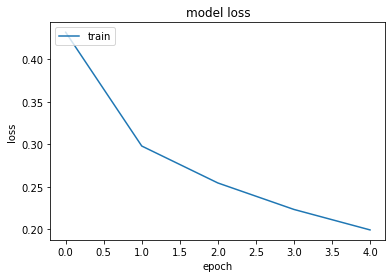

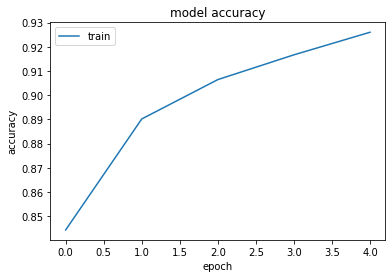

In [8]:
plot_history(history)

## Visualizing the Convolutions and Pooling

In [9]:
model.layers

In [10]:
print(x_test[0].shape)
print(x_test[0].reshape(1, 28, 28, 1).shape)
print(x_test.shape)

(28, 28)
(1, 28, 28, 1)
(10000, 28, 28)


1/1 [==============================] - 0s 13ms/step


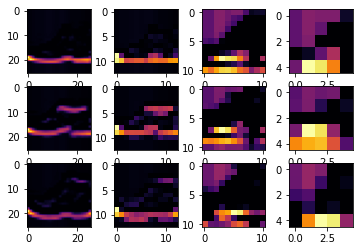

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## change to 64 channels/convolutions

In [12]:
## set seed so that model has same 'common ground' (it node's weight and bias are the same value on each creation)
tf.random.set_seed(10)


# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  # generate 64 filters, 3 by 3 
  # 64 filters meaning there would be 64 new images convoluted
  # input_shape=(28, 28, 1) means the dimension of image is 28 by 28 and only 1 channel (grayscale 0-255)
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [13]:
# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
history = model.fit(x_train, y_train, epochs=5)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4100 - accuracy: 0.8509
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2772 - accuracy: 0.8975
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2328 - accuracy: 0.9144
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1994 - accuracy: 0.9260
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1708 - accuracy: 0.9360


In [14]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(x_test, y_test)
print(test_loss)


MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2646 - accuracy: 0.9083
[0.2646028399467468, 0.90829998254776]


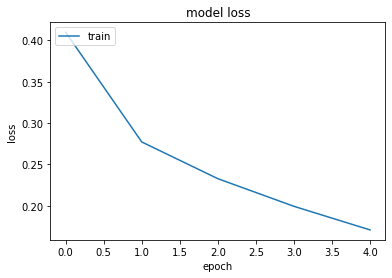

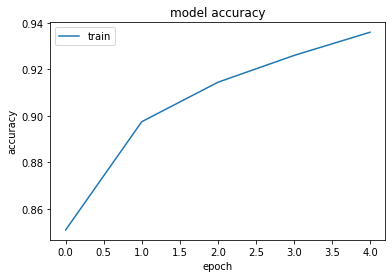

In [15]:
plot_history(history)

1/1 [==============================] - 0s 13ms/step


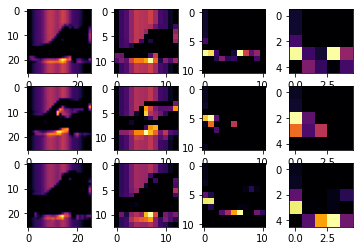

In [16]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## change to more complex network convolutions

In [26]:
## set seed so that model has same 'common ground' (it node's weight and bias are the same value on each creation)
tf.random.set_seed(10)

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), ## 26
    tf.keras.layers.MaxPooling2D(2, 2), ## 13
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), ## 11
    tf.keras.layers.MaxPooling2D(2,2), ## 5
    # The third convolution
#    tf.keras.layers.Conv2D(256, (3,3), activation='relu'), ## 3
#    tf.keras.layers.MaxPooling2D(2,2), # 1
    # The fourth convolution
#    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
#    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 3200)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
history = model.fit(x_train, y_train, epochs=5)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3961 - accuracy: 0.8562
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2645 - accuracy: 0.9026
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2182 - accuracy: 0.9186
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1828 - accuracy: 0.9319
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1535 - accuracy: 0.9429


adding layers does not necessarily equals to increase of performance. Sometimes you hit the law of diminishing return and please also note that adding layer means decreasing number of nodes to be flattened thus can decreasing the complexity of neural network function

In [28]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(x_test, y_test)


MODEL EVALUATION:
313/313 [==============================] - 2s 6ms/step - loss: 0.2563 - accuracy: 0.9070


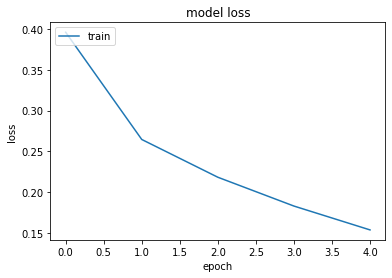

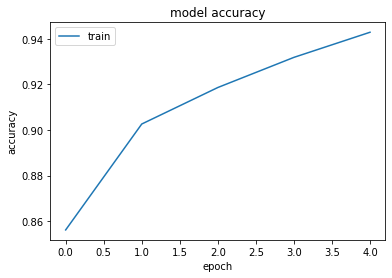

In [29]:

plot_history(history)

1/1 [==============================] - 0s 21ms/step


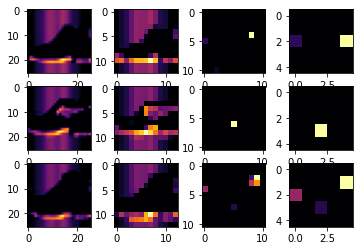

In [30]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)